In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random
import re
import seaborn as sns
from sklearn.metrics import confusion_matrix
from zipfile import ZipFile
from glob import glob
from google.colab import drive
from keras.models import Sequential
from PIL import Image
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.layers import Dropout,BatchNormalization
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adagrad
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import auc


drive.mount('/content/drive')

file_name = '/content/drive/My Drive/Final Project DL & ML/chest-xray.zip'

with ZipFile(file_name, 'r') as zip_file:
  zip_file.extractall()  # Extract all contents of the ZIP file.
  print('Done')

train_path = '/content/chest_xray/chest_xray/train'
val_path = '/content/chest_xray/chest_xray/val'
test_path = '/content/chest_xray/chest_xray/test'

pre_path = '/content/chest_xray/chest_xray/'


# Define paths for different sets and classes.
train_normal_dir = pre_path + 'train/NORMAL/'
train_pneu_dir = pre_path + 'train/PNEUMONIA/'

test_normal_dir = pre_path + 'test/NORMAL/'
test_pneu_dir = pre_path + 'test/PNEUMONIA/'

val_normal_dir = pre_path + 'val/NORMAL/'
val_pneu_dir = pre_path + 'val/PNEUMONIA/'


#initiliazing the healthy, bacteria and virus cases of the images
virus = [] #1493 images total
bacteria = [] #2780 images total
healthy = [] #1583 images total

healthy += glob(train_normal_dir + '*jpeg')

#By using Regular Expressions we sorting the cases properly
#0- healthy, 1- virus case, 2 - bacteria case
for i in os.listdir(train_pneu_dir):
  if(re.search("virus.*jpeg", i)):
      virus.append([train_pneu_dir+i,1])
  elif(re.search("bacteria.*jpeg", i)):
      bacteria.append([train_pneu_dir+i,2])

healthy += glob(test_normal_dir + '*jpeg')

for i in os.listdir(test_pneu_dir):
  if(re.search("virus.*jpeg", i)):
      virus.append([test_pneu_dir+i,1])
  elif(re.search("bacteria.*jpeg", i)):
      bacteria.append([test_pneu_dir+i,2])

healthy += glob(val_normal_dir + '*jpeg')

for i in os.listdir(val_pneu_dir):
  if(re.search("virus.*jpeg", i)):
      virus.append([val_pneu_dir+i,1])
  elif(re.search("bacteria.*jpeg", i)):
      bacteria.append([val_pneu_dir+i,2])

for i in range(len(healthy)):
  healthy[i]=(healthy[i],0)

for lst in [healthy,virus,bacteria]:
  random.shuffle(lst)

# print(len(healthy))
# print(len(virus))
# print(len(bacteria))

# """# Creating the test, train and validation sets"""
# # 15% validation(878) and 20% test sets(1172), 65% train set from all data(3806)
# # Splitting data into train, validation, and test sets

val = virus[:250] + bacteria[:450] + healthy[:178]
test = virus[250:500] + bacteria[450:900] + healthy[178:650]
train = virus[500:] + bacteria[900:] + healthy[650:]


def NormalPixels_Labels(data):
    # normalizing the pixels i=on every image and label
    normal = []
    labels = []
    for im_path, label in data:
        if label == 2:
           #works only for Q1
            labels.append(1)
        else:
            labels.append(label)
        image = Image.open(im_path)  # Open image
        image = image.convert("L")   # Convert to grayscale
        resized_image = image.resize((180,180))  # Resize the image
        image_array = np.array(resized_image)  # Convert to NumPy array
        im_normal = image_array / 255.0  # Normalize pixel values
        normal.append(im_normal)
    return np.array(normal), np.array(labels)


def CreatingtVal(val):
    val_norm, val_label = NormalPixels_Labels(val)  # Normalize validation data
    return val_norm, val_label

def CreatingtTrain(train):
    train_norm, train_label = NormalPixels_Labels(train)  # Normalize training data
    return train_norm, train_label

def CreatingtTest(test):
    test_norm, test_label = NormalPixels_Labels(test)  # Normalize test data
    return test_norm, test_label


# Load and preprocess the data
val_norm, val_label = CreatingtVal(val)
train_norm, train_label = CreatingtTrain(train)
test_norm, test_label = CreatingtTest(test)






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Done


Training CNN with SGD: learning rate: 0.0001, epochs: 30


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_84 (Conv2D)                   │ (None, 180, 180, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_70               │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_84 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_85 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_85 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_86 (Conv2D)                   │ (None, 45, 45, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_71               │ (None, 45, 45, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_86 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_87 (Conv2D)                   │ (None, 23, 23, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_72               │ (None, 23, 23, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_87 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_88 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_73               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_88 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_89 (Conv2D)                   │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_74               │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 466,177 (1.78 MB)

 Trainable params: 465,089 (1.77 MB)

 Non-trainable params: 1,088 (4.25 KB)

Epoch 1/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.6800 - loss: 0.7363 - val_accuracy: 0.7973 - val_loss: 0.5585
Epoch 2/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8416 - loss: 0.4016 - val_accuracy: 0.7973 - val_loss: 0.6092
Epoch 3/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8745 - loss: 0.3392 - val_accuracy: 0.8155 - val_loss: 0.3706
Epoch 4/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8856 - loss: 0.3139 - val_accuracy: 0.9089 - val_loss: 0.2243
Epoch 5/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8884 - loss: 0.2811 - val_accuracy: 0.9169 - val_loss: 0.2055
Epoch 6/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8989 - loss: 0.2676 - val_accuracy: 0.9169 - val_loss: 0.2001
Epoch 7/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9094 - loss: 0.2344 - val_accuracy: 0.9271 - val_loss: 0.1901
Epoch 8/30
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9118 - loss: 0.2502 - val_acc

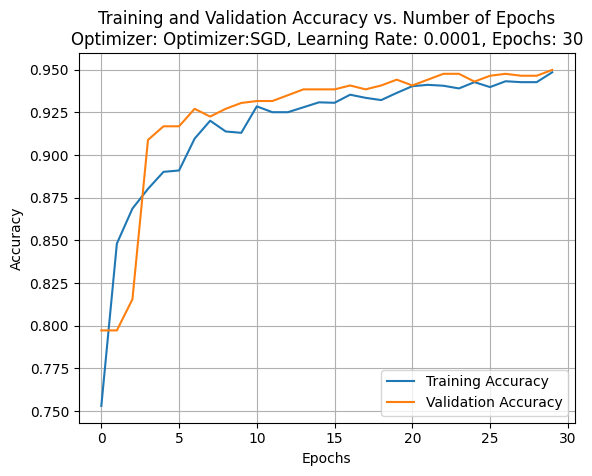

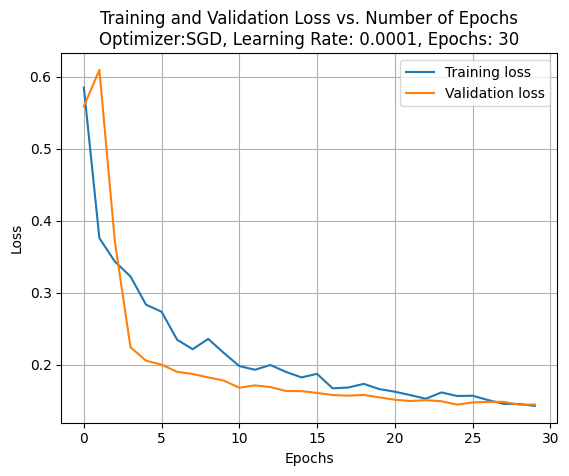

In [32]:
# Build the model
test_accs = []
test_loss_accs = []
epochs = [30]
learning_rates = [0.0001]


for lr in learning_rates:
  for epoch in epochs:
        print(f"Training CNN with SGD: learning rate: {lr}, epochs: {epoch}")
        CNN = models.Sequential()

        CNN.add(layers.Conv2D(32, (3, 3), padding = 'same' ,activation='relu', input_shape=(180, 180, 1)))
        CNN.add(BatchNormalization())
        CNN.add(layers.MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
        CNN.add(layers.Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))

        CNN.add(layers.MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
        CNN.add(layers.Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
        CNN.add(Dropout(0.1))
        CNN.add(BatchNormalization())

        CNN.add(layers.MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
        CNN.add(layers.Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
        CNN.add(BatchNormalization())

        CNN.add(layers.MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
        CNN.add(layers.Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
        CNN.add(Dropout(0.2))
        CNN.add(BatchNormalization())

        CNN.add(layers.MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
        CNN.add(layers.Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
        CNN.add(Dropout(0.3))
        CNN.add(BatchNormalization())

        CNN.add(layers.MaxPooling2D((2,2) , strides = 2 , padding = 'same'))

        CNN.add(layers.Flatten())
        CNN.add(Dropout(0.3))
        CNN.add(layers.Dense(1, activation = 'sigmoid'))

        # Compile the model
        CNN.compile(optimizer = optimizers.SGD(learning_rate=lr),loss='binary_crossentropy', metrics=['accuracy'])

        CNN.summary()

        history = CNN.fit(train_norm, train_label, epochs = epoch, batch_size = 20,
                            validation_data=(val_norm, val_label), verbose=1)
        # Evaluate the model on the test set
        test_loss, test_acc = CNN.evaluate(test_norm, test_label, verbose=1)
        test_accs.append((test_acc,f' Learning Rate: {lr}, Epochs: {epoch}'))
        test_loss_accs.append((test_loss,f'Learning Rate: {lr}, Epochs: {epoch}'))
        print("\nTest accuracy: ", test_acc)
        print("\nTest loss: ", test_loss)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Training and Validation Accuracy vs. Number of Epochs\nOptimizer: Optimizer:SGD, Learning Rate: {lr}, Epochs: {epoch}')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.grid()
        plt.legend(loc='lower right')
        plt.show()

        plt.clf() # clear figure
        plt.plot(history.history['loss'], label='Training loss')
        # b is for "solid blue line"
        plt.plot(history.history['val_loss'], label='Validation loss')
        plt.title(f'Training and Validation Loss vs. Number of Epochs\nOptimizer:SGD, Learning Rate: {lr}, Epochs: {epoch}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.grid()
        plt.legend(loc='upper right')
        plt.show()

In [33]:
test_loss, test_acc = CNN.evaluate(test_norm, test_label, verbose=1)
print("\nTest accuracy: ", test_acc)
print("\nTest loss: ", test_loss)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9417 - loss: 0.1359

Test accuracy:  0.9402730464935303

Test loss:  0.16169407963752747
